In [46]:
import numpy as np
import matplotlib.pyplot as plt
import time
from MagicCube import MagicCube

In [47]:
# Parameter
initialTemp = 1000
coolingRate = 0.99
maxIterations = 10000
n = 5

In [48]:
# Fungsi Simulated Annealing
def simulatedAnnealing(mc, initialTemp, coolingRate, maxIterations):

    # Menghasilkan kubus acak sebagai state awal
    currentCube = mc.generateRandomStates()
    mc.cube = currentCube
    currentObjective = mc.objectiveFunction()
    bestCube = currentCube.copy()
    bestObjective = currentObjective

    # List untuk melacak nilai selama iterasi
    temperatures = []
    objectives = []
    deltaEvalues = []
    neighbors = []  
    iterations = []  

    startTime = time.time()

    for iteration in range(maxIterations):

        # Menghitung suhu untuk iterasi saat ini
        temperature = initialTemp * (coolingRate ** iteration)
        if temperature <= 0:
            break

        # Memilih dua posisi acak dan nge swap menggunakan metode swapElements()
        pos1 = (np.random.randint(0, mc.n), np.random.randint(0, mc.n), np.random.randint(0, mc.n))
        pos2 = (np.random.randint(0, mc.n), np.random.randint(0, mc.n), np.random.randint(0, mc.n))
        mc.swapElements(pos1, pos2)

        # Evaluasi kubus baru (neighbor)
        newObjective = mc.objectiveFunction()
        deltaE = newObjective - currentObjective
        deltaEvalues.append(np.exp(-deltaE / temperature) if temperature > 0 else 0)

        # Menyimpan neighbor dan iterasi
        neighbors.append(newObjective)  
        iterations.append(iteration)  

        # Kondisi penerimaan solusi
        if deltaE < 0 or np.random.rand() < np.exp(-deltaE / temperature):
            currentCube = mc.cube.copy()
            currentObjective = newObjective

            # Update kubus terbaik jika ditemukan solusi lebih baik
            if currentObjective < bestObjective:
                bestCube = currentCube.copy()
                bestObjective = currentObjective
        else:
            # Jika solusi baru tidak diterima, balikkan swap untuk kembali ke state sebelumnya
            mc.swapElements(pos1, pos2)

        # Menyimpan nilai untuk visualisasi
        temperatures.append(temperature)
        objectives.append(currentObjective)

        # Cek jika sudah magic cube (objective function = 0), keluar dari loop
        if mc.isValid():
            print("Magic Cube ditemukan dengan nilai objective function = 0!")
            break

    endTime = time.time()
    duration = endTime - startTime

    return bestCube, bestObjective, objectives, temperatures, deltaEvalues, neighbors, iterations, duration


In [49]:
# Menjalankan eksperimen
def runExperiment():
    for run in range(3):
        print(f"\n========= RUN {run + 1} =========")
        
        # Inisialisasi Magic Cube baru untuk setiap run
        mc = MagicCube(n)
        
        # Menampilkan state awal dari kubus
        print("STATE AWAL KUBUS :")
        mc.visualize()
        
        # Run algoritma Simulated Annealing
        bestCube, bestObjective, objectives, temperatures, deltaEvalues, neighbors, iterations, duration = simulatedAnnealing(
            mc, initialTemp, coolingRate, maxIterations
        )
        
        # Menampilkan neighbor dan iterasi
        for i in range(len(neighbors)):
            print(f"Iterasi {iterations[i]}: Current Objective = {objectives[i]}, Neighbor = {neighbors[i]}")

        # Menampilkan state akhir dari kubus
        print("\nSTATE AKHIR KUBUS :")
        mc.cube = bestCube
        mc.visualize()

        # Menampilkan nilai objective function akhir yang dicapai
        print(" - Nilai Objective Function Akhir:", bestObjective)

        # Menampilkan durasi proses pencarian
        print(" - Durasi Proses Pencarian:", duration, "detik")

        # Menghitung dan menampilkan frekuensi stuck di local optima
        stuckCount = sum(1 for i in range(1, len(objectives)) if objectives[i] == objectives[i - 1])
        print(" - Frekuensi Stuck di Local Optima:", stuckCount)

        print("\n PLOT OBJECTIVE FUNCTION TERHADAP ITERASI :")
        
        # Plot nilai objective function terhadap iterasi
        plt.plot(objectives)
        plt.title(f"Objective Function terhadap Iterasi (Run {run + 1})")
        plt.xlabel("Iterasi")
        plt.ylabel("Objective Function")
        plt.show()
        
        print("\n PLOT (e ^ (delta E / T)) TERHADAP ITERASI :")

        # Plot (e^(delta E / T)) terhadap iterasi
        plt.plot(deltaEvalues)
        plt.title(f"Plot (e^(delta E / T)) terhadap Iterasi (Run {run + 1})")
        plt.xlabel("Iterasi")
        plt.ylabel("(e^(delta E / T))")
        plt.show()
        



========= RUN 1 =========
STATE AWAL KUBUS :


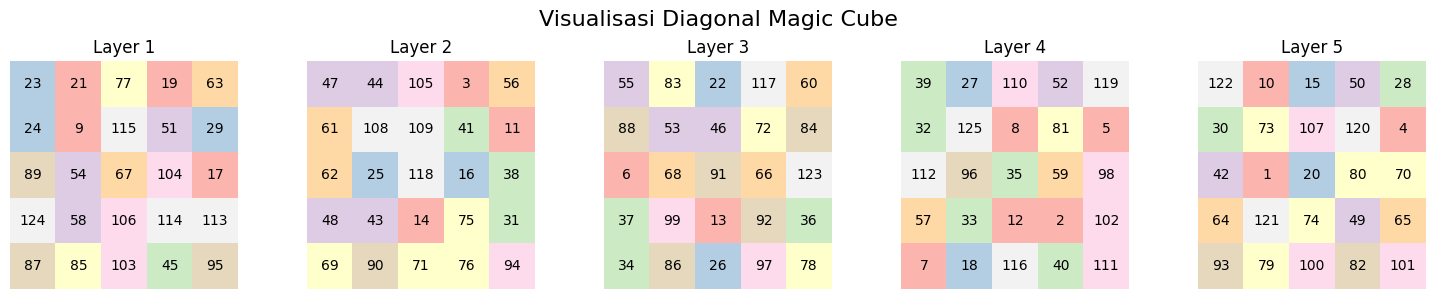

Objective function: 5824
Objective function: 5804
Objective function: 5804
Objective function: 5904
Objective function: 5904
Objective function: 5964
Objective function: 5964
Objective function: 5944
Objective function: 5944
Objective function: 5772
Objective function: 5772
Objective function: 5732
Objective function: 5732
Objective function: 5714
Objective function: 5714
Objective function: 5664
Objective function: 5664
Objective function: 5772
Objective function: 5772
Objective function: 5900
Objective function: 5900
Objective function: 5873
Objective function: 5873
Objective function: 6077
Objective function: 6077
Objective function: 6221
Objective function: 6077
Objective function: 6087
Objective function: 6087
Objective function: 6115
Objective function: 6115
Objective function: 6117
Objective function: 6117
Objective function: 6166
Objective function: 6166
Objective function: 6118
Objective function: 6118
Objective function: 6036
Objective function: 6036
Objective function: 6205


/var/folders/mm/qxk0j36n0xx3dqwlgzl5rfy40000gn/T/ipykernel_87956/2482273497.py:35: RuntimeWarning: overflow encountered in exp
  deltaEvalues.append(np.exp(-deltaE / temperature) if temperature > 0 else 0)


Objective function: 1207
Objective function: 1387
Objective function: 1207
Objective function: 1669
Objective function: 1207
Objective function: 1216
Objective function: 1207
Objective function: 1209
Objective function: 1207
Objective function: 1732
Objective function: 1207
Objective function: 1425
Objective function: 1207
Objective function: 1277
Objective function: 1207
Objective function: 1211
Objective function: 1207
Objective function: 1897
Objective function: 1207
Objective function: 1751
Objective function: 1207
Objective function: 1253
Objective function: 1207
Objective function: 1429
Objective function: 1207
Objective function: 1301
Objective function: 1207
Objective function: 1363
Objective function: 1207
Objective function: 1591
Objective function: 1207
Objective function: 1645
Objective function: 1207
Objective function: 1423
Objective function: 1207
Objective function: 1575
Objective function: 1207
Objective function: 1693
Objective function: 1207
Objective function: 1364


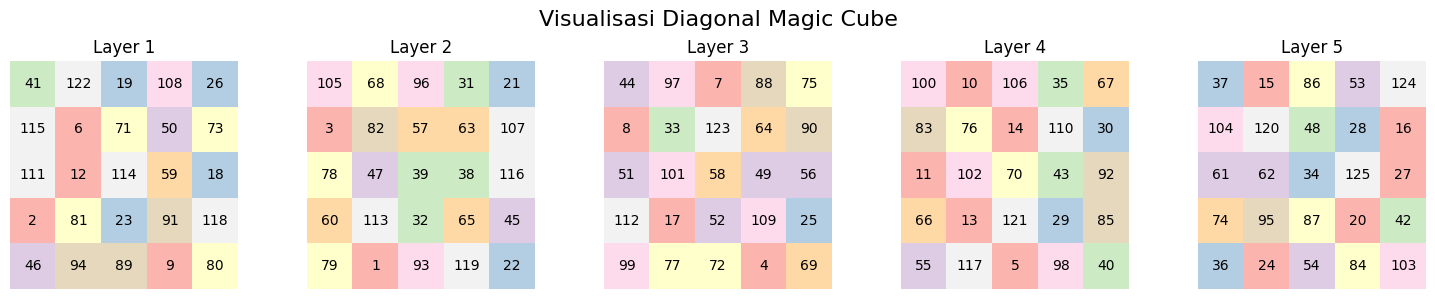

 - Nilai Objective Function Akhir: 468
 - Durasi Proses Pencarian: 3.684286117553711 detik
 - Frekuensi Stuck di Local Optima: 9494

 PLOT OBJECTIVE FUNCTION TERHADAP ITERASI :


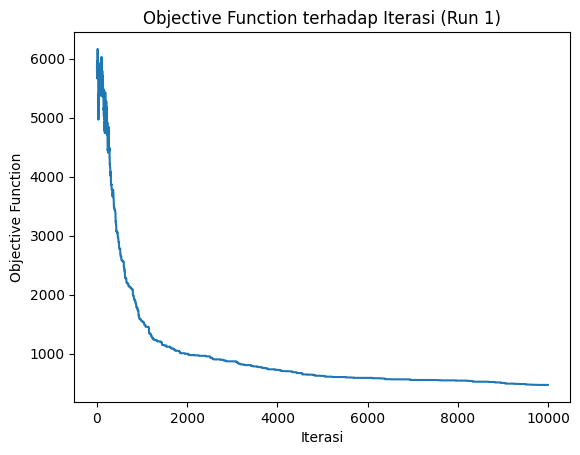


 PLOT (e ^ (delta E / T)) TERHADAP ITERASI :


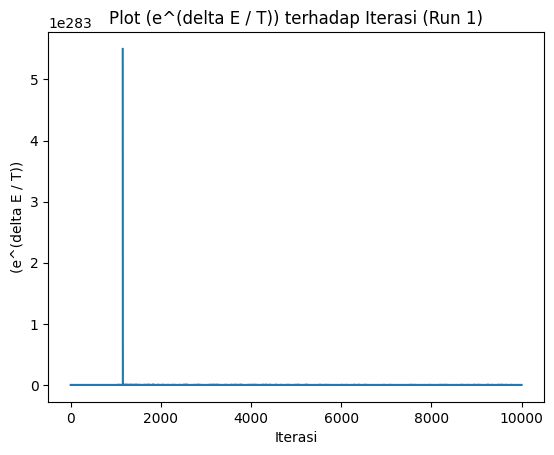


========= RUN 2 =========
STATE AWAL KUBUS :


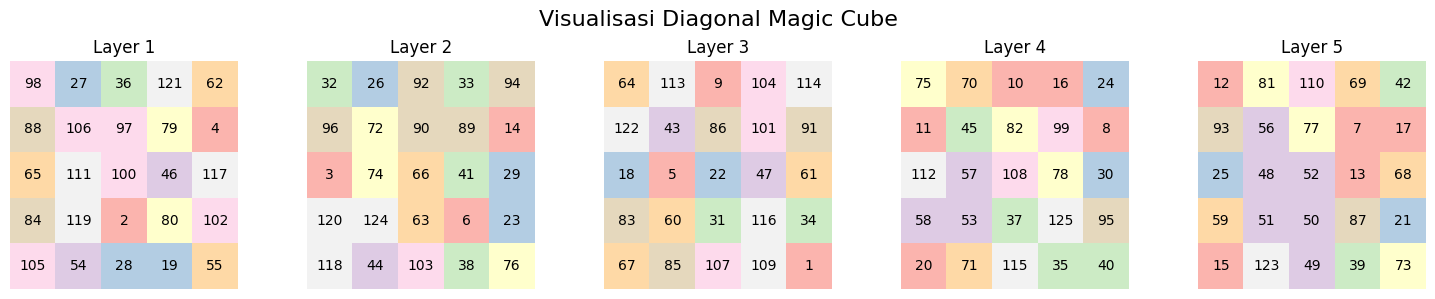

Objective function: 5299
Objective function: 5293
Objective function: 5293
Objective function: 5287
Objective function: 5287
Objective function: 5450
Objective function: 5450
Objective function: 5468
Objective function: 5468
Objective function: 5394
Objective function: 5394
Objective function: 5355
Objective function: 5355
Objective function: 5595
Objective function: 5595
Objective function: 5645
Objective function: 5645
Objective function: 5651
Objective function: 5651
Objective function: 5517
Objective function: 5517
Objective function: 5532
Objective function: 5532
Objective function: 5730
Objective function: 5730
Objective function: 5730
Objective function: 5730
Objective function: 5544
Objective function: 5544
Objective function: 5658
Objective function: 5658
Objective function: 5468
Objective function: 5468
Objective function: 5608
Objective function: 5608
Objective function: 5646
Objective function: 5608
Objective function: 5568
Objective function: 5568
Objective function: 5598


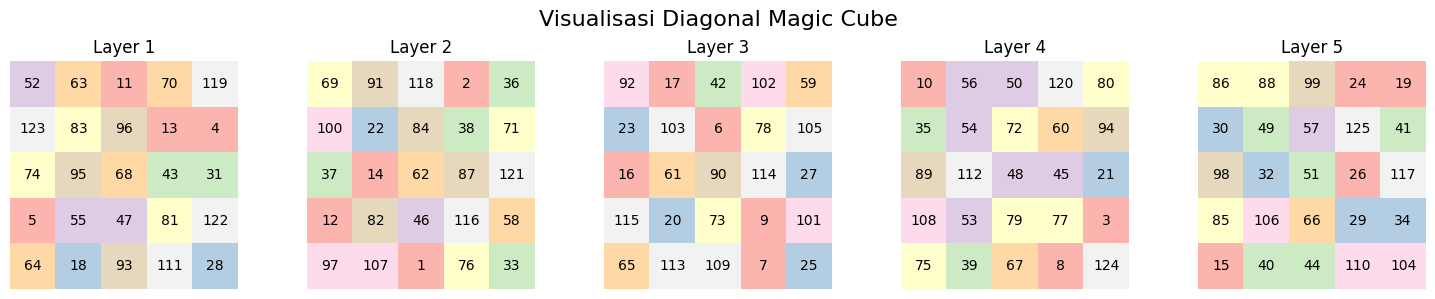

 - Nilai Objective Function Akhir: 332
 - Durasi Proses Pencarian: 3.4102048873901367 detik
 - Frekuensi Stuck di Local Optima: 9489

 PLOT OBJECTIVE FUNCTION TERHADAP ITERASI :


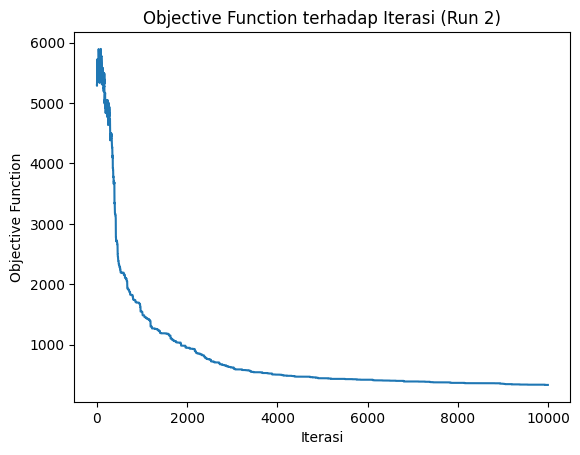


 PLOT (e ^ (delta E / T)) TERHADAP ITERASI :


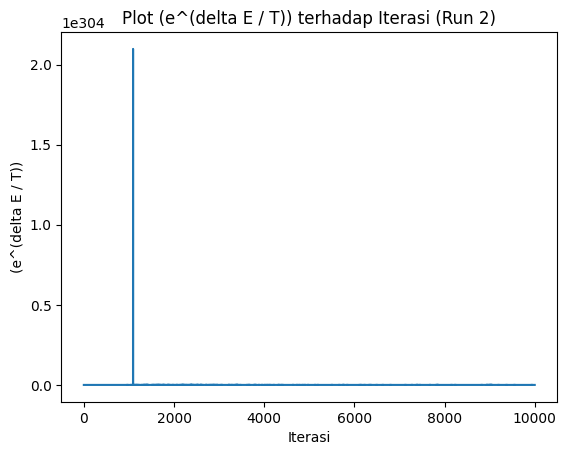


========= RUN 3 =========
STATE AWAL KUBUS :


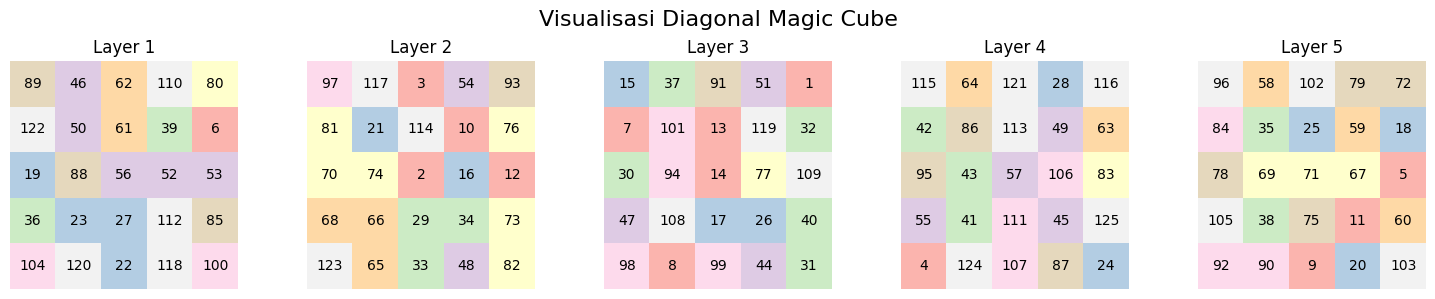

Objective function: 4960
Objective function: 4992
Objective function: 4992
Objective function: 4935
Objective function: 4935
Objective function: 5001
Objective function: 5001
Objective function: 5049
Objective function: 5049
Objective function: 5029
Objective function: 5029
Objective function: 4993
Objective function: 4993
Objective function: 5091
Objective function: 4993
Objective function: 5052
Objective function: 5052
Objective function: 5080
Objective function: 5080
Objective function: 5290
Objective function: 5290
Objective function: 5286
Objective function: 5286
Objective function: 5256
Objective function: 5256
Objective function: 5304
Objective function: 5304
Objective function: 5292
Objective function: 5292
Objective function: 5212
Objective function: 5212
Objective function: 5212
Objective function: 5212
Objective function: 5190
Objective function: 5190
Objective function: 5272
Objective function: 5272
Objective function: 5498
Objective function: 5498
Objective function: 5666


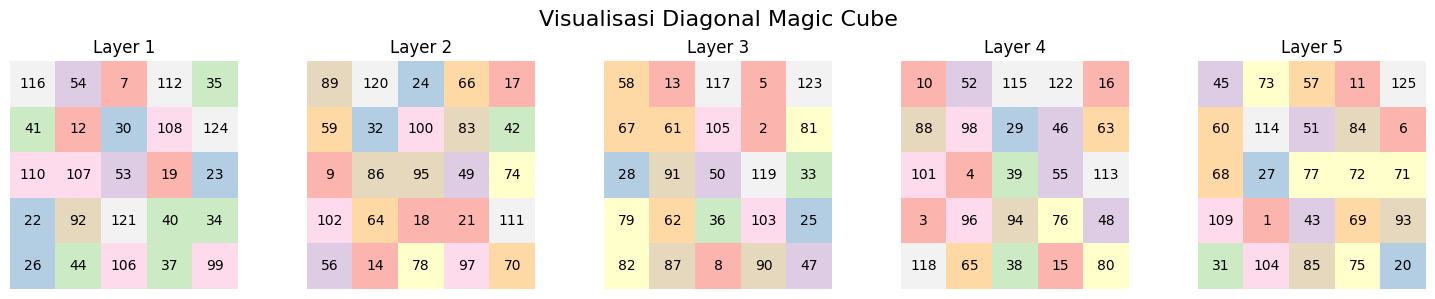

 - Nilai Objective Function Akhir: 252
 - Durasi Proses Pencarian: 3.441634178161621 detik
 - Frekuensi Stuck di Local Optima: 9423

 PLOT OBJECTIVE FUNCTION TERHADAP ITERASI :


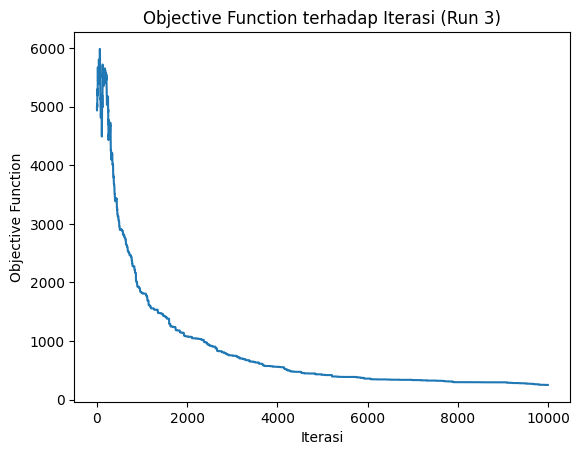


 PLOT (e ^ (delta E / T)) TERHADAP ITERASI :


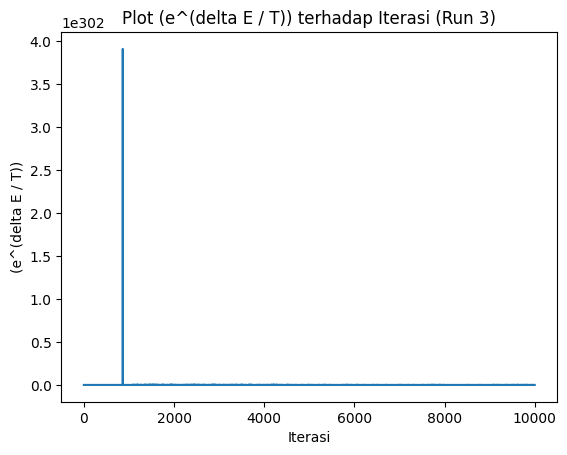

In [50]:
runExperiment()